In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from ase.spacegroup import crystal
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.analysis.diffraction import xrd
from pymatgen.symmetry import analyzer
from ase.visualize import view
import sys
sys.path.append('../../')
import DataAnalysis as aj
from ase.utils.xrdebye import XrDebye
from pymatgen.symmetry.structure import SymmetrizedStructure
from ase.io import write
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry import analyzer




Atoms(symbols='Na4Cl4', pbc=True, cell=[5.6402, 5.6402, 5.6402])
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not available
<xrdebye::get_atomic> Element Na not avail

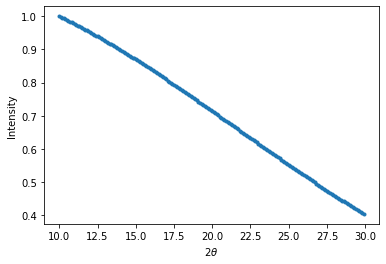

In [2]:
a = 5.6402
test1 = crystal(['Na','Cl'],[(0,0,0) , (0.5,0.5,0.5)], spacegroup = 225, cellpar = [a,a,a,90,90,90], size  = (1,1,1))

print(test1)

xrd_ase = XrDebye(atoms = test1, wavelength = 5.0523)

xrd_ase.calc_pattern(x = np.arange(10,30,0.1), mode = 'XRD')
xrd_ase.plot_pattern()

xrd_ana = xrd.XRDCalculator(wavelength = 'CuKa')


Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.640200   5.640200   5.640200
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na    0    0    0
  1  Na    0    0.5  0.5
  2  Na    0.5  0    0.5
  3  Na    0.5  0.5  0
  4  Cl    0.5  0.5  0.5
  5  Cl    0.5  0    0
  6  Cl    0    0.5  0
  7  Cl    0    0    0.5
SymmetrizedStructure
Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.640200   5.640200   5.640200
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b    c  Wyckoff
---  ----  ---  ---  ---  ---------
  0  Na    0    0    0    4a
  1  Cl    0.5  0.5  0.5  4b


<BarContainer object of 9 artists>

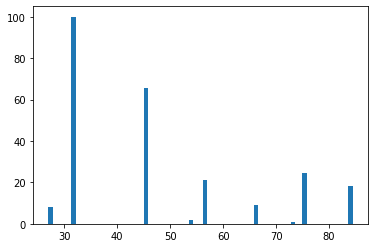

In [3]:
struc =AseAtomsAdaptor.get_structure(test1)
struc_symm = analyzer.SpacegroupAnalyzer(struc).get_symmetrized_structure()
test_patt = xrd_ana.get_pattern(struc_symm,two_theta_range=(0, 90))
print(struc)
print(struc_symm)

plt.bar(test_patt.x, test_patt.y)


Na
('Na', 'Cl')
Fe
Ni
('Rb', 'I')


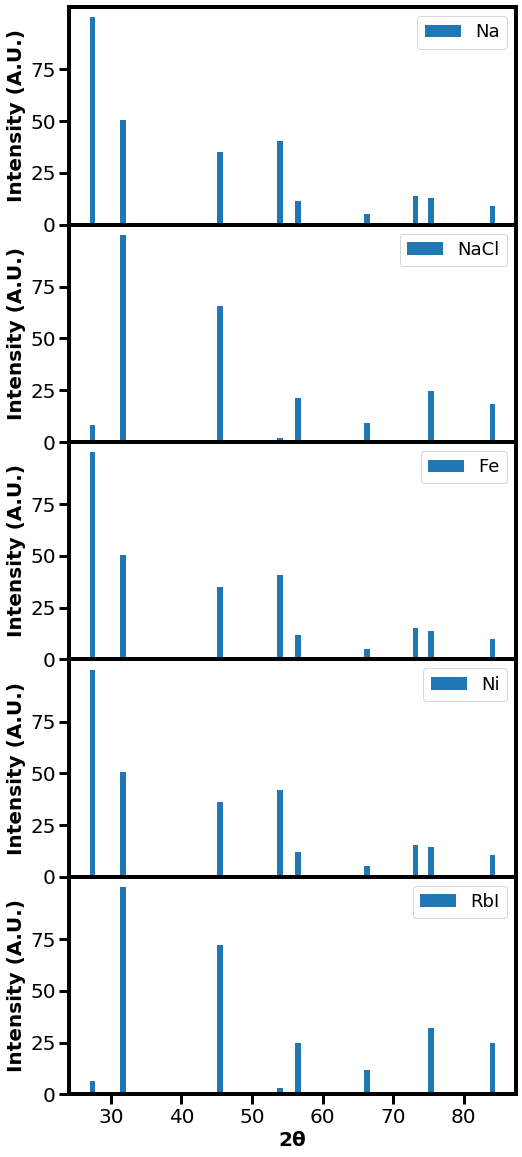

In [4]:
test_ele = ['Na',('Na','Cl'), 'Fe','Ni',('Rb','I'),]
test_lattice = []
f, ax = plt.subplots(nrows = len(test_ele), ncols = 1, figsize = [8,20], sharex = True)
f.subplots_adjust(hspace = 0)

for i,ele in enumerate(test_ele):
    print (ele)
    if type(ele) is not str:
        test1 = crystal(ele,[(0,0,0) , (0.5,0.5,0.5)], spacegroup = 225, cellpar = [a,a,a,90,90,90], size  = (1,1,1))
        write(''.join(ele) + '.png', test1)
        struc =AseAtomsAdaptor.get_structure(test1)
        test_patt = xrd_ana.get_pattern(struc,two_theta_range=(0, 90))
        ax[i].bar(test_patt.x, test_patt.y, label = ''.join(ele))
        
    else:
        test1 = crystal(ele,[(0,0,0)], spacegroup = 225, cellpar = [a,a,a,90,90,90], size  = (1,1,1))
        write(ele + '.png', test1)
        struc =AseAtomsAdaptor.get_structure(test1)
        test_patt = xrd_ana.get_pattern(struc,two_theta_range=(0, 90))

        ax[i].bar(test_patt.x, test_patt.y, label = ele)
    ax[i].set_yticks([0,25,50,75])
    if i == len (test_ele) - 1:
        aj.figure_quality_axes(ax[i], r'2$\bf{\theta}$','Intensity (A.U.)','',legend = True)
    else:
        aj.figure_quality_axes(ax[i], r'','Intensity (A.U.)','',legend = True)
        ax[i].set_xticklabels = ([])

    
        


Na
[ 5.85766682 18.97061703 12.07059449  3.83022956]
('Na', 'Cl')
[ 4.34067918 13.7566388   8.42863976  2.60677035  9.76486092  6.85136962
  2.22448388  8.71147549]
Fe
[9.59973063]
Ni
[ 7.42335634 24.80586819]
('Rb', 'I')
[ 4.64553247 14.77797884  9.11125169  2.82932016 10.65891261  7.54935859
  2.46659006]


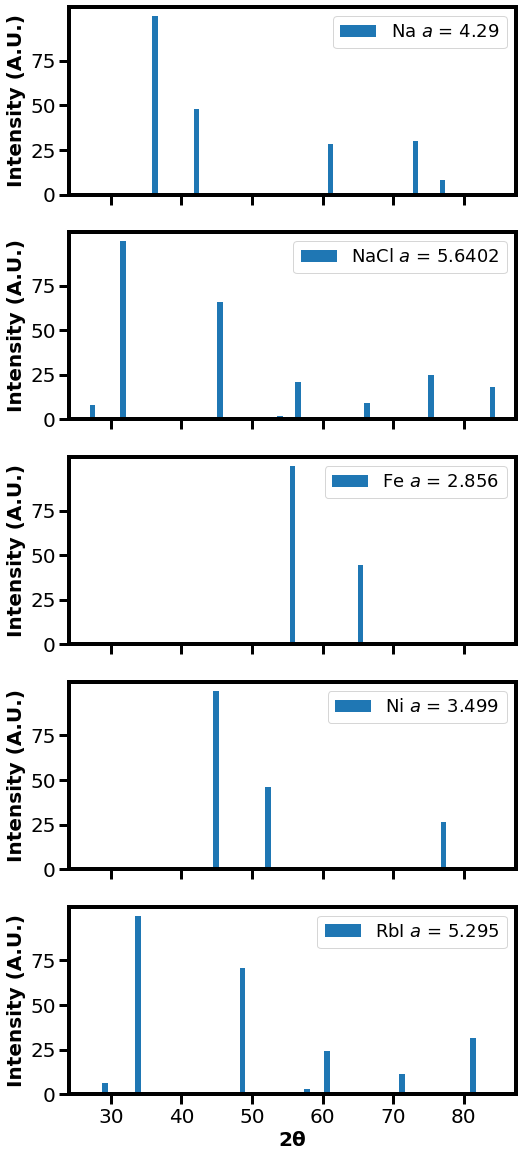

In [5]:

test_ele = ['Na',('Na','Cl'), 'Fe','Ni',('Rb','I'),]
test_lattice = [4.29,5.6402,2.856, 3.499, 5.295]
f, ax = plt.subplots(nrows = len(test_ele), ncols = 1, figsize = [8,20], sharex = True)

for i,ele in enumerate(test_ele):
    a = test_lattice[i]
    print (ele)
    if type(ele) is not str:
        test1 = crystal(ele,[(0,0,0) , (0.5,0.5,0.5)], spacegroup = 225, cellpar = [a,a,a,90,90,90], size  = (1,1,1))
        write(''.join(ele) + str(a)+'.png', test1)
        struc =AseAtomsAdaptor.get_structure(test1)
        test_patt = xrd_ana.get_pattern(struc,two_theta_range=(0, 90))
        ax[i].bar(test_patt.x, test_patt.y, label = ''.join(ele) + r' $\it{a}$ = ' + str(a))
    else:
        test1 = crystal(ele,[(0,0,0)], spacegroup = 225, cellpar = [a,a,a,90,90,90], size  = (1,1,1))
        write(ele + str(a)+ '.png', test1)
        struc =AseAtomsAdaptor.get_structure(test1)
        test_patt = xrd_ana.get_pattern(struc,two_theta_range=(0, 90))
        ax[i].bar(test_patt.x, test_patt.y, label = ele + r' $\it{a}$ = ' + str(a))
    
    ax[i].set_yticks([0,25,50,75])
    if i == len (test_ele) - 1:
        aj.figure_quality_axes(ax[i], r'2$\bf{\theta}$','Intensity (A.U.)','',legend = True)
    else:
        aj.figure_quality_axes(ax[i], r'','Intensity (A.U.)','',legend = True)
        ax[i].set_xticklabels = ([])
    print (np.diff(np.array(test_patt.x)))
        